In [1]:
import numpy as np
import glob
import pandas as pd
from pandas import Series,DataFrame
from sklearn.cluster import MiniBatchKMeans
import os
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

import sampling as smp
sample_dir='/Users/gus/CDIPS/nerve-project/samples/'

if os.environ['USER'] == 'chrisv':
    sample_dir = os.path.join(smp.datafolder, 'samples')

sample_images = glob.glob(sample_dir+'*')


def load_data():
    data= pd.read_msgpack('patch_data')
    return data

In [4]:
time data=smp.build_data(50,50,17)

/Users/chrisv/Code/CDIPS/uns/sampling.py:113: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return image[hor_range[0]:hor_range[1],ver_range[0]:ver_range[1]]


CPU times: user 4.22 s, sys: 363 ms, total: 4.59 s
Wall time: 4.71 s


In [5]:
skeys = sorted(data.keys())

In [6]:
skeys[0]

(1, 33, (85.0, 215.0))

In [8]:
def grab_ultra_patches(F):
    im_patches=[]
    for idx, key in enumerate(skeys):
        if idx%500 ==0:
            print('Reading patch ', idx)
        ultra_image = smp.image_pair(key[0],key[1]).image
        im_patches.append(smp.get_patch(ultra_image,key[2],F).flatten())
    return np.array(im_patches)

In [9]:
time ultra_patches = grab_ultra_patches(17)

Reading patch  0


/Users/chrisv/Code/CDIPS/uns/sampling.py:113: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return image[hor_range[0]:hor_range[1],ver_range[0]:ver_range[1]]


Reading patch  500
Reading patch  1000
Reading patch  1500
Reading patch  2000
Reading patch  2500
Reading patch  3000
Reading patch  3500
Reading patch  4000
Reading patch  4500
CPU times: user 3min 17s, sys: 14 s, total: 3min 31s
Wall time: 3min 32s


In [10]:
dataList = [data[k].flatten() for k in skeys ]
dataArray = np.array(dataList)

In [11]:
dataList[0].shape

(1225,)

In [12]:
kmeans= MiniBatchKMeans(100).fit(dataArray)
predictions=MiniBatchKMeans(100).fit_predict(dataArray)

/Users/chrisv/anaconda/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:1279: DeprecationWarning: This function is deprecated. Please call randint(0, 4796 + 1) instead
  0, n_samples - 1, init_size)
/Users/chrisv/anaconda/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 4796 + 1) instead
  0, n_samples - 1, init_size)
/Users/chrisv/anaconda/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 4796 + 1) instead
  0, n_samples - 1, init_size)
/Users/chrisv/anaconda/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 4796 + 1) instead
  0, n_samples - 1, init_size)
/Users/chrisv/anaconda/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:1328: DeprecationWarning: This function is deprecated. Please call randint(0, 4796 + 1) instead
  0,

In [13]:
clusters=[arr .reshape(35,35) for arr in kmeans.cluster_centers_ ]

In [14]:
predictions.shape

(4797,)

In [15]:
pred =  DataFrame(predictions,columns=['cluster'])

In [16]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4797 entries, 0 to 4796
Data columns (total 1 columns):
cluster    4797 non-null int32
dtypes: int32(1)
memory usage: 18.8 KB


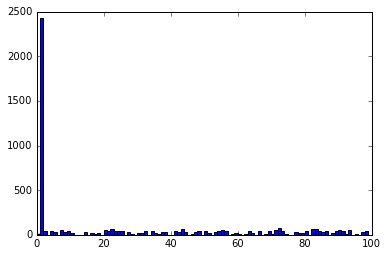

In [17]:
cluster_sizes=plt.hist(pred.cluster,bins=range(100)[::1])

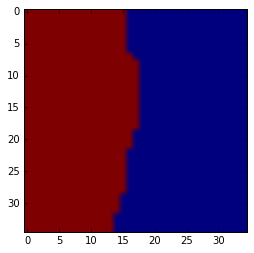

In [29]:
plt.imshow(clusters[99])

In [30]:
clusters[99].shape

(35, 35)

In [115]:
ncols = 10
nrows = int(len(clusters)/ncols)
nx, ny = clusters[0].shape
canvas = np.zeros((nrows*dx+1, ncols*nx+1))
for i, cluster in enumerate(clusters):
    ir = int(i/nc)
    ic = i % nc
    canvas[ir*ny:(ir+1)*ny,ic*nx:(ic+1)*nx] = clusters[i]    

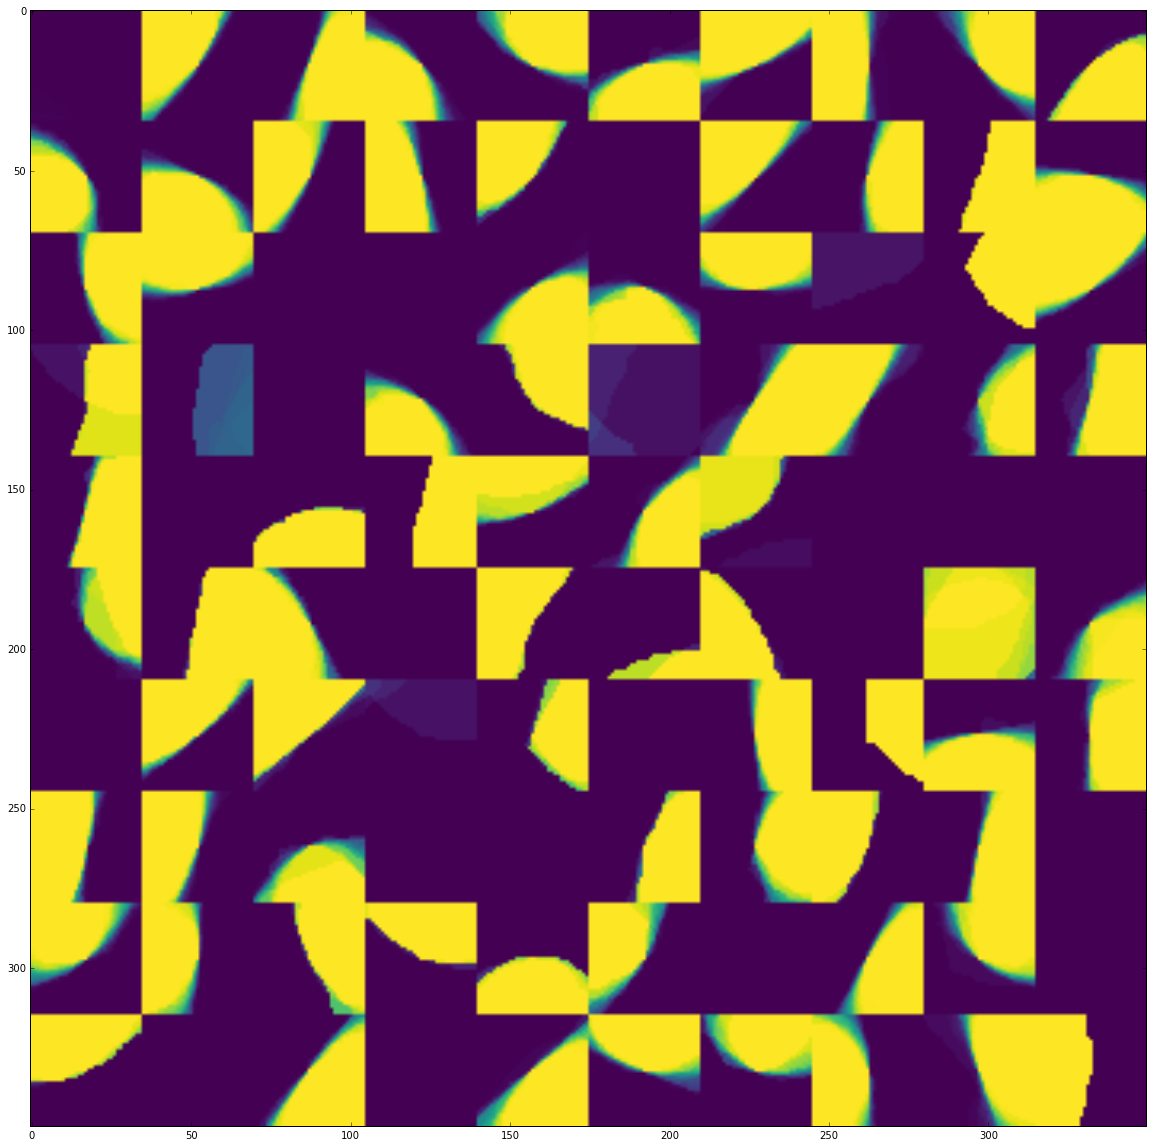

In [117]:
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(canvas, cmap=plt.cm.viridis)